## **Project title**
### Data Analysis of emissions from CO$_{2}$ and other greenhouse gas 

### Import necessary libraries and load dataframe. 
**Note:** Given that this is a group work, I added lots of text in the script on purpose which is to aid reasabiltity.

In [75]:
# Remove the # sign to install the relevant libraries incase you don't have them.

#!pip install pycountry # This is incase you that have this already installed
#!pip install ipywidgets # This is incase you that have this already installed
#!pip install pandas # This is incase you that have this already installed
#!pip install matplotlib # This is incase you that have this already installed
#!pip install typing # This is incase you that have this already installed
#!pip install warnings # This is incase you that have this already installed

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pycountry
from typing import Callable
import ipywidgets
import warnings

warnings.filterwarnings('ignore')
df = pd.read_csv("https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv")

### **My Task:**
- Analysis of CO$_{2}$ sources for four major emitters e.g China, India, Russia and United States
- The CO$_{2}$ data used are the annual total (territorial emissions) production-based emissions in million tonnes, excluding land-use change and traded goods.
- Source of data: [Our World in Data](https://github.com/owid/co2-data)

#### First step is to briefly examine the dataframe. There are several ways to do this.

This can be done by using any of:
```
df.info(), df.describe(), df.sample(), df.head(), df.tail() etc.
```

#### Data cleaning
    Step 1. Reduction of dataframe to global columns of interest

In [2]:
def country_and_non_country_df(source_df: pd.DataFrame) -> pd.DataFrame:
    
    """
    Aim: to divide the dataframe into countries and non countries. 
    And filter out non co2 columns.
    """
    # 1. Filter columns (country, year, iso_code, co2) using pandas .str.contains()
    strings_of_interest = 'country|year|iso_code|co2'
    boolean_array = source_df.columns.str.contains(strings_of_interest)

    # 2. Array of filtered columns containing country, year, iso_code and all co2 types
    filtered_columns = source_df.columns[boolean_array]

    # 3. Dataframe of filtered columns based on step 2
    df_filtered_column = source_df[filtered_columns]

    # 4. Get list of countries iso code using python pycountry library.
    # In the library the iso_code is repremented with alpha_3.
    list_of_iso_code = [country.alpha_3 for country in pycountry.countries]

    # 5. Filter the dataframe using the list of iso codes. 
    bool_var1 = df_filtered_column['iso_code'].isin(list_of_iso_code)
    df_countries_1 = df_filtered_column.loc[bool_var1] 
   
    # 6. I noticed that Kosovo was missing because it has no iso_code in our original  
    # dataframe, hence, it is excluded during step 5. Next is to get list of countries.
    unique_countries = df_countries_1.country.unique() # array
    list_of_countries = list(unique_countries) # convert array to list
    
    # 7. Add Kosovo to list of countries. Note: the extend method returns non so 
    # it shouldn't be assign to a variable.
    list_of_countries.extend(['Kosovo'])
    
    # 8. Now filter dataframe from step 3 with our new list of countries that includes Kosovo
    bool_var2 = df_filtered_column['country'].isin(list_of_countries)
    df_countries_2 = df_filtered_column.loc[bool_var2] 
    
    # 9. Use the negation sign (~) on bool_var2 to get non countries dataframe
    df_non_countries = df_filtered_column.loc[~bool_var2]
    
    return df_countries_2, df_non_countries

In [30]:
#countries, non_countries = country_and_non_country_df(df)
#non_countries.country.unique()

    Step 2. Subdivide dataframe from step 1 to specific columns of interest, e.g major emiiters by country,
            types of co2 sources.

In [42]:
def major_emitters_all_years_df(emitters: list, co2_types: list) -> pd.DataFrame:
    """
    Selected co2 types using the function defined above.
    """ 
    df_country, _ = country_and_non_country_df(df) # See definition above
    
    # Select dataframe based on some columns co2_types
    df_country = df_country[co2_types]
    
    # Select dataframe based on major emitters. It is assumed this is known.
    df_country = df_country.loc[df_country['country'].isin(emitters)]
    
    # Fill missing values with zero.
    df_country.fillna(0, inplace=True) 
    return df_country

# Define your emitters and co2 types of your choice
major_emitters =["China", "United States", "India", "Russia"]
co2_types_country_yr = ['country', 'year', 'cement_co2', 'coal_co2', 
                        'flaring_co2', 'gas_co2','oil_co2', 'other_industry_co2']

data = major_emitters_all_years_df(emitters=major_emitters, co2_types=co2_types_country_yr)

#### Interactively display normalized dataframe for any sigle year for the major emitters using ipywidgets library

    Step 1. Create inputs for ipywidgets, I used a 5 year interval

In [12]:
def list_of_zipped_arrays(dataframe: pd.DataFrame, year_interval: int) -> list:
    """
    Note: this function will be used by two functions bellow.
    Before calling the 'ipywidgets.interact' from ipywidgets library, I want to 
    create an input of the form [('1800', 1800), ('1810', 1810), ...] if i used 
    10 years interval. This will be used in the dropdown menu.
    """
    # Create array of integer years
    start_year = dataframe['year'].min()
    end_year = dataframe['year'].max()
    year_gap = year_interval
    
    year_array_integer = np.arange(start=start_year, stop=end_year + year_gap,
                                   step=year_gap, dtype=int)

    # Create array of integer string using year_array_integer
    year_array_string = map(str, year_array_integer)

    # Now zip both variables to achive something like [('1800', 1800), ('1810', 1810), ...]
    input_values = list(zip(year_array_string, year_array_integer))
    return input_values

# major_emitters =["China", "United States", "India", "Russia"]
# co2_types_country_yr = ['country', 'year', 'cement_co2', 'coal_co2',
#                        'flaring_co2', 'gas_co2','oil_co2', 'other_industry_co2']

# data = major_emitters_all_years_df(emitters=major_emitters, co2_types = co2_types_country_yr)
# list_of_zipped_arrays(dataframe=data, year_interval=1)

    Step 2. Create the dropdown menu to display dataframe. 

In [44]:
print("\nSelect any year of your chioce to display the dataframe.\n")

# Just enter any emitters and co2 of interest
major_emitters =["China", "United States", "India", "Russia"]
co2_types_country_yr = ['country', 'year', 'cement_co2', 'coal_co2', 'flaring_co2',
                        'gas_co2','oil_co2', 'other_industry_co2']

# This functions are already defined above
data_df = major_emitters_all_years_df(emitters=major_emitters, 
                                      co2_types = co2_types_country_yr)
start_value = data_df['year'].min()
yr_interval=1 # Controls year interval
input_values = list_of_zipped_arrays(dataframe=data_df, year_interval=yr_interval) 
inputs = ipywidgets.widgets.Dropdown(options=input_values, 
                                     value=start_value, description='Select year:')

# Decorate the function below using interact method from the the ipywidgets library. This is 
# possible because the method supports the concept of function decoration in python.

@ipywidgets.interact(Year=inputs)
def major_emitters_single_year_df(Year: int) -> pd.DataFrame:
    """
    Aim to create dataframe of a single year for the four major emitters
    """
    df_single_yr = data_df[data_df['year'].isin([Year])]
    
    # Sum using axis = 1. Same as sum every value in a single row and assign it 
    # to 'cal_co2_total' column
    df_single_yr.fillna(0, inplace=True) # Just in case there's missiong value
    df_single_yr['cal_co2_total'] = df_single_yr.loc[:,'cement_co2':].sum(axis=1)
    
    # Starting from cement_co2 column divide each row by corresponding 'cal_co2_total' using axis = 0
    df_single_yr.loc[:,'cement_co2':] = df_single_yr.loc[:,'cement_co2':].div(df_single_yr['cal_co2_total'], axis=0)
    df_single_yr.fillna(0, inplace=True)

    # Coonvert to percentage
    df_single_yr.loc[:,'cement_co2':] = df_single_yr.loc[:,'cement_co2':].multiply(100)
    return df_single_yr


Select any year of your chioce to display the dataframe.



interactive(children=(Dropdown(description='Select year:', options=(('1800', 1800), ('1801', 1801), ('1802', 1…

It can be seen that only the United States has records between 1800 and 1850. And during this time CO$_{2}$ emissions mostly came from coal:

#### Data visualization

Bar and line graphs were created to visualize our data.

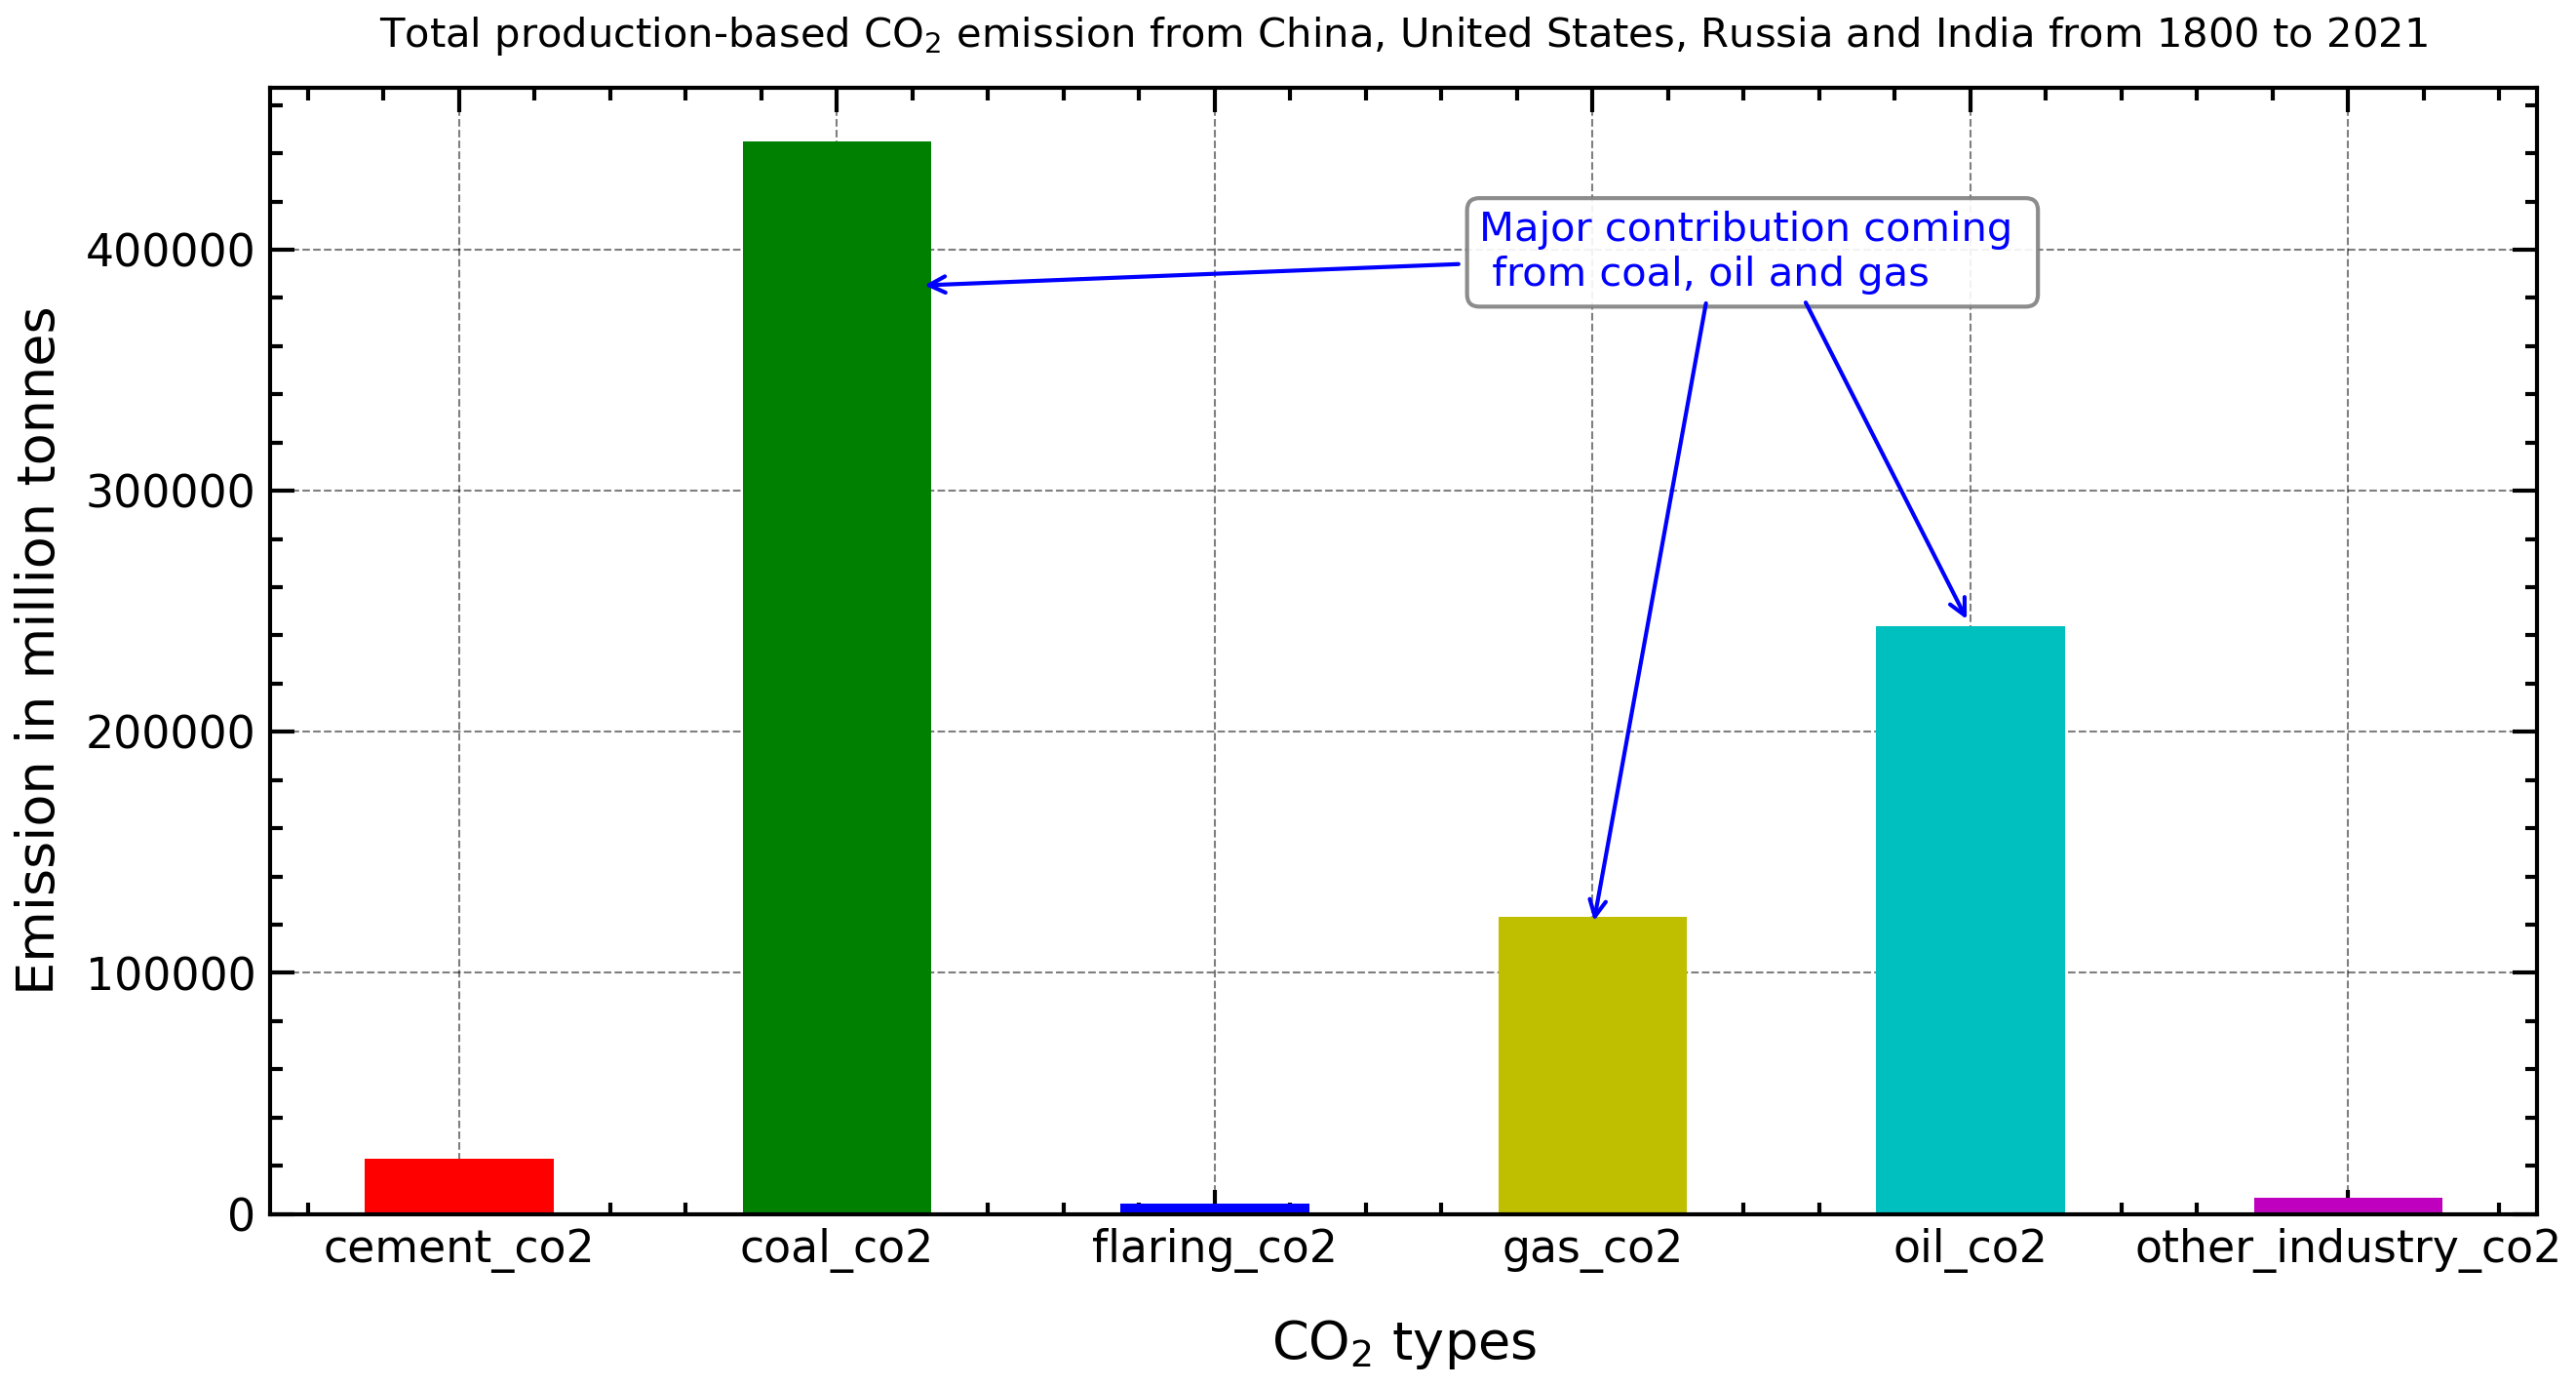

In [28]:
def plot_co2_abs_value_all_years(dataframe: pd.DataFrame) -> None:
    """
    Aim: to plots absolute values of all co2 types using dataframe from
    major_emitters_all_years_df function defined above.
    
    """
    # Sum individual co2 types along axis=0. For example for cement_co2, summing gives 
    # total cement_co2 emission for the given year(s) considered.
    plotting_data = dataframe.loc[:,'cement_co2':].sum(axis=0)
    
    # Plotting
    try:
        plt.style.use(['science', 'notebook', 'grid'])
    except OSError:
        print("\033[1mNote:\033[0m science, notebook, grid style not found, defaulting to matplotlib seaborn-whitegrid style\n")
        plt.style.use(['seaborn-whitegrid'])
        
    plt.figure(figsize=(10, 5), dpi=300) 
    
    # Colors for each bars (co2 types)
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    ax_plt = plotting_data.plot(kind='bar', rot=0, color=colors)
    ax_plt.set_xlabel('CO$_{2}$ types', fontsize=13, labelpad=11)
    ax_plt.set_ylabel('Emission in million tonnes', fontsize=13, labelpad=5)
    ax_plt.set_title(f'Total production-based CO$_{2}$ emission from China,' \
                     f' United States, Russia and India from 1800 to 2021', fontsize=10, pad=10)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    
    # For text and drawing arrows
    bar_heights = [h.get_height() for h in ax_plt.patches]
    plt.annotate(f'Major contribution coming \n from coal, oil and gas', xy=(1.21, bar_heights[1]-60000),  
                 xytext=(2.7, bar_heights[1]-60000), color='b', arrowprops={"arrowstyle":"->", "color":"b"},textcoords='data', 
                 xycoords="data", bbox=dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9))
    plt.annotate(' ', xy=(3.0, bar_heights[3]-5000), xytext=(3.3, bar_heights[1]-57000), color='b', 
                 arrowprops={"arrowstyle":"->", "color":"b"})
    plt.annotate(' ', xy=(4.0, bar_heights[4]-100), xytext=(3.5, bar_heights[1]-57000), color='b', 
                 arrowprops={"arrowstyle":"->", "color":"b"})
    #plt.savefig('total_co2')
    plt.show()
    
major_emitters =["China", "United States", "India", "Russia"]
co2_types_country_yr = ['country', 'year', 'cement_co2', 'coal_co2', 'flaring_co2',
                        'gas_co2','oil_co2', 'other_industry_co2']

# This functions are already defined above
data_df = major_emitters_all_years_df(emitters=major_emitters, co2_types = co2_types_country_yr)
plot_co2_abs_value_all_years(dataframe=data_df)

#### Interactive bar plot for single year

In [40]:
major_emitters =["China", "United States", "India", "Russia"]
co2_types_country_yr = ['country', 'year', 'cement_co2', 'coal_co2',
                       'flaring_co2', 'gas_co2','oil_co2', 'other_industry_co2']

data_df = major_emitters_all_years_df(emitters=major_emitters, co2_types = co2_types_country_yr)

start_value = data_df['year'].min()
input_values = list_of_zipped_arrays(dataframe=data_df, year_interval=1) 

interact_inputs = ipywidgets.widgets.Dropdown(options=input_values, 
                                     value=start_value, description='Select year:')

@ipywidgets.interact(Year=interact_inputs)
def plot_co2_normalised_value_single_year(Year: int) -> None:
    
    """
    These plot is for the percentage of indiviual co2 contribution.
    It answers question like what is the percentage of China contribution 
    to the different co2 types for a particular year. 
    """
    try:
        plt.style.use(['science', 'notebook', 'grid'])
    except OSError:
        print("\033[1mNote:\033[0m science, notebook, grid style not found, defaulting to matplotlib seaborn-whitegrid style\n")
        plt.style.use(['seaborn-whitegrid'])
        
    # Function already defined above
    df_sel_co2_data = major_emitters_single_year_df(Year)
    columns_to_plot = df_sel_co2_data.columns[2:-1]
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    
    # PLOTTING
    df_sel_co2_data.plot(x='country', y= columns_to_plot, kind='bar', stacked=True, fontsize=15,
                         figsize=(15,7), rot=0, color=colors, legend=True)

    plt.legend(title='CO$_{2}$ types', title_fontsize=14, fontsize=12, fancybox=True, 
               loc='center right', bbox_to_anchor=(1.2, 0.8), labelspacing=0.7, ncol=1)
    
    plt.xlabel('Country', fontsize=18, labelpad=6.0)
    plt.ylabel('Percentage of CO$_{2}$ emission', fontsize=18, labelpad=6.0)
    plt.title(f'Contribution of four major CO$_{2}$ emitters in {Year}', pad=12.0, fontsize=15)
    

interactive(children=(Dropdown(description='Select year:', options=(('1800', 1800), ('1801', 1801), ('1802', 1…

#### Static bar plot (subplots) for comparing two different years

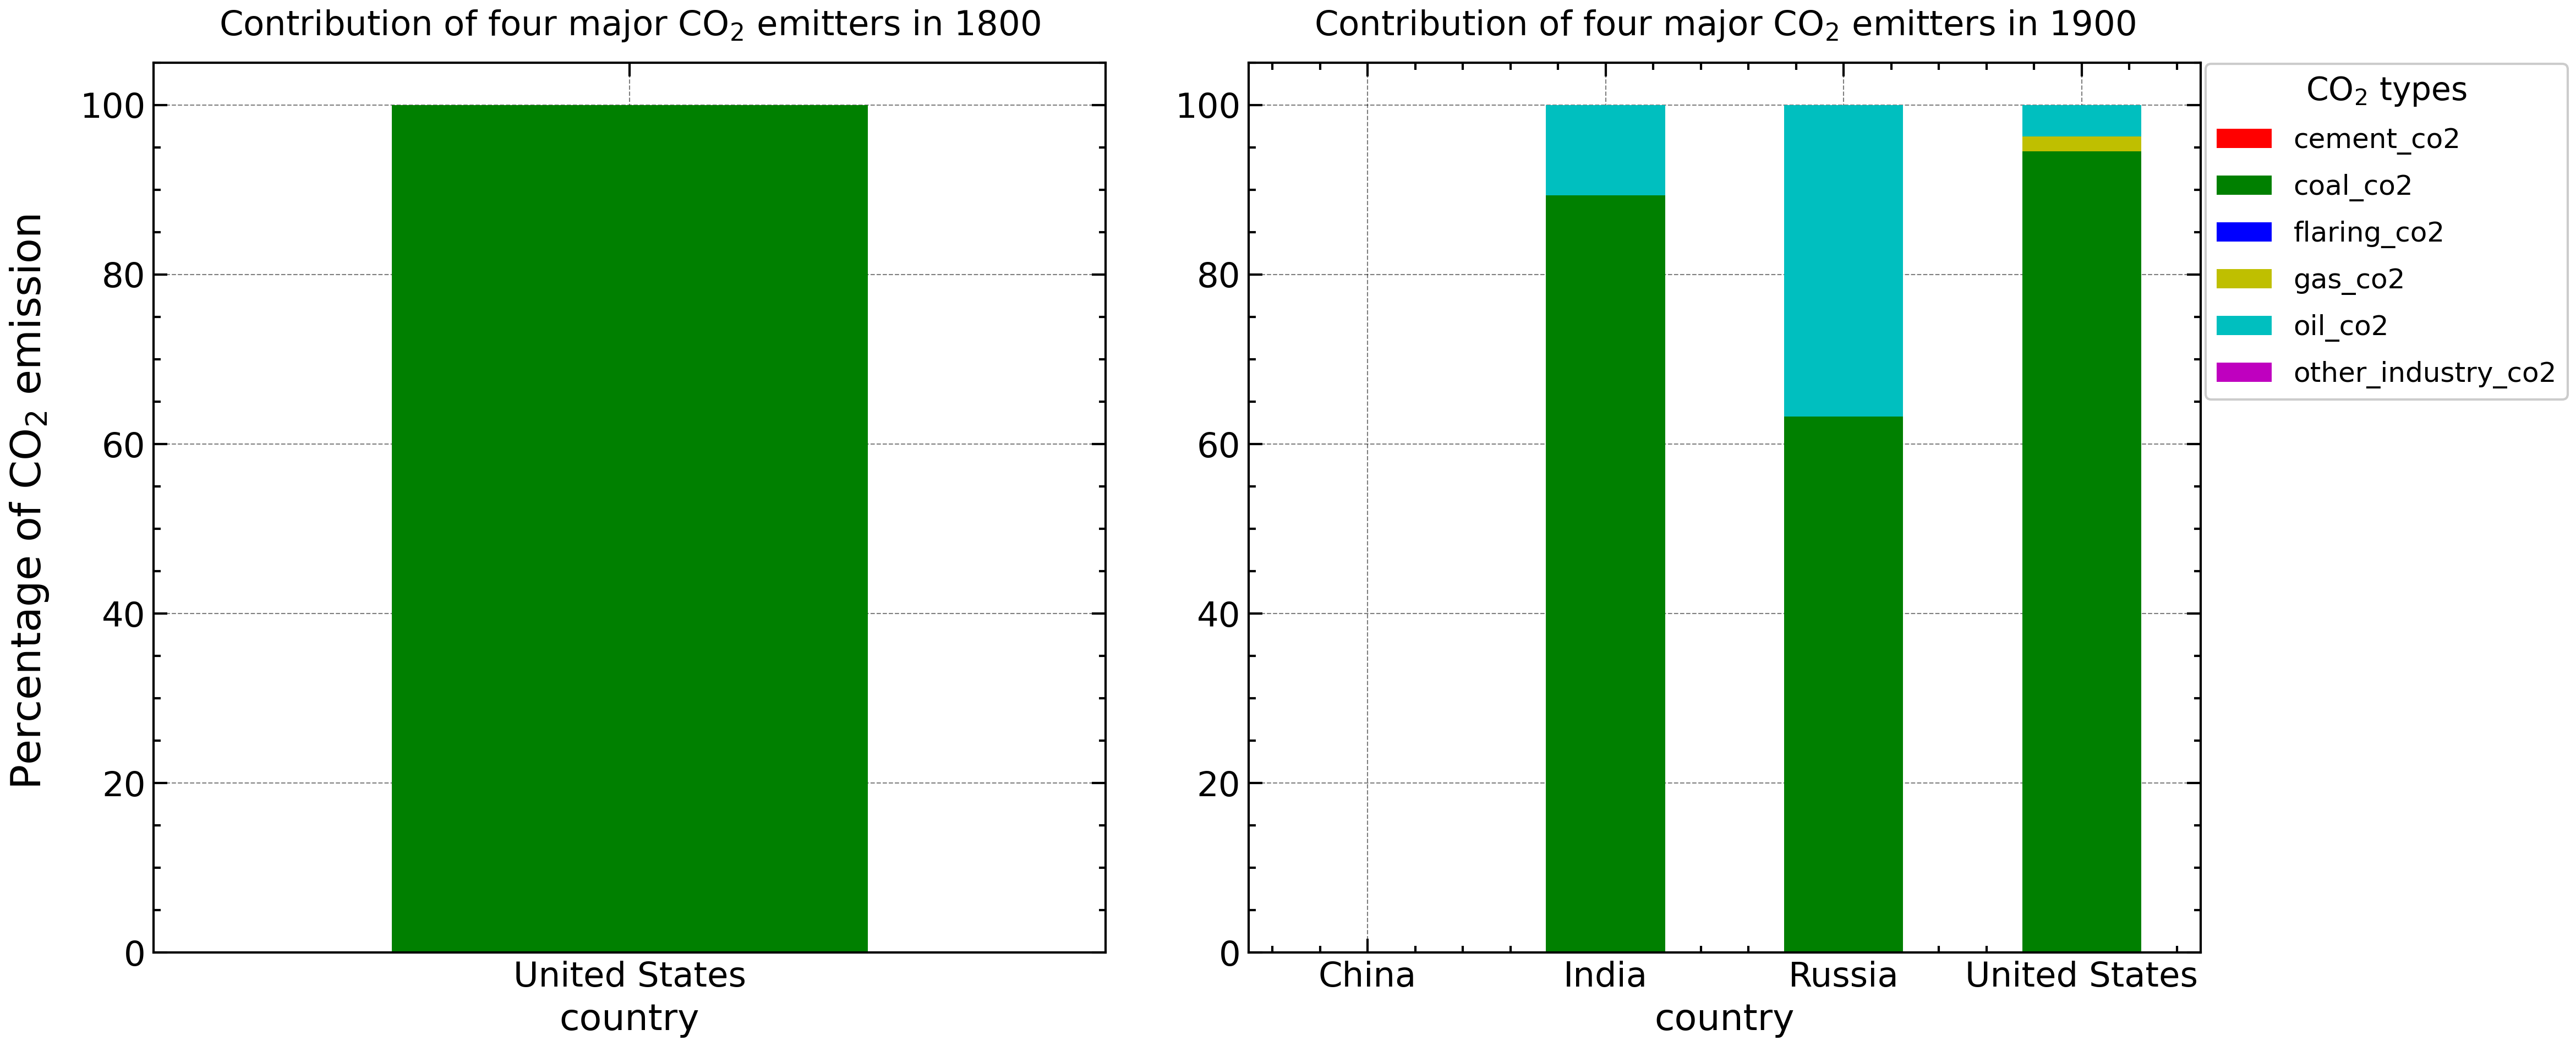

In [97]:

# Just enter any emitters and co2 of interest
major_emitters =["China", "United States", "India", "Russia"]
co2_types_country_yr = ['country', 'year', 'cement_co2', 'coal_co2', 'flaring_co2',
                        'gas_co2','oil_co2', 'other_industry_co2']

# This functions are already defined above
data_df = major_emitters_all_years_df(emitters=major_emitters, 
                                      co2_types = co2_types_country_yr)
def subplot_co2_countribution_two_years(year: list[int, int]) -> None:
    """
    This is just for two for one row two columns plot.
    """
    
    try:
        plt.style.use(['science', 'notebook', 'grid'])
    except OSError:
        print("\033[1mNote:\033[0m science, notebook, grid style not found, defaulting to matplotlib seaborn-whitegrid style\n")
        plt.style.use(['seaborn-whitegrid'])
        
    fig, axes = plt.subplots(1, 2, figsize=[16, 7], dpi=300, sharex=False, sharey=False)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.15, hspace=None)
    fig.supylabel('Percentage of CO$_{2}$ emission', fontsize=18, x=0.07)
    
    #year = [1960,2020]
    for i, j_yr in enumerate(year):
        df_sel_co2_data = major_emitters_single_year_df(j_yr)
        columns_to_plot = df_sel_co2_data.columns[2:-1]
        colors = ['r', 'g', 'b', 'y', 'c', 'm']
        
        # PLOTTING
        df_sel_co2_data.plot(x='country', y=columns_to_plot, kind='bar', stacked=True, fontsize=15,
                               rot=0, ylim=(0,105), ax=axes[i], color=colors, legend=False)

        axes[i].set_title(f'Contribution of four major CO$_{2}$ emitters in {j_yr}', pad=12.0, fontsize=15)
   
    plt.legend(title='CO$_{2}$ types', title_fontsize=14, fontsize=12, fancybox=True,
                  loc='center right', bbox_to_anchor=(1.40, 0.81), labelspacing=0.7, ncol=1)
    plt.show()
    
subplot_co2_countribution_two_years([1800,1900])

#### Time series plots

1. Static lineplot

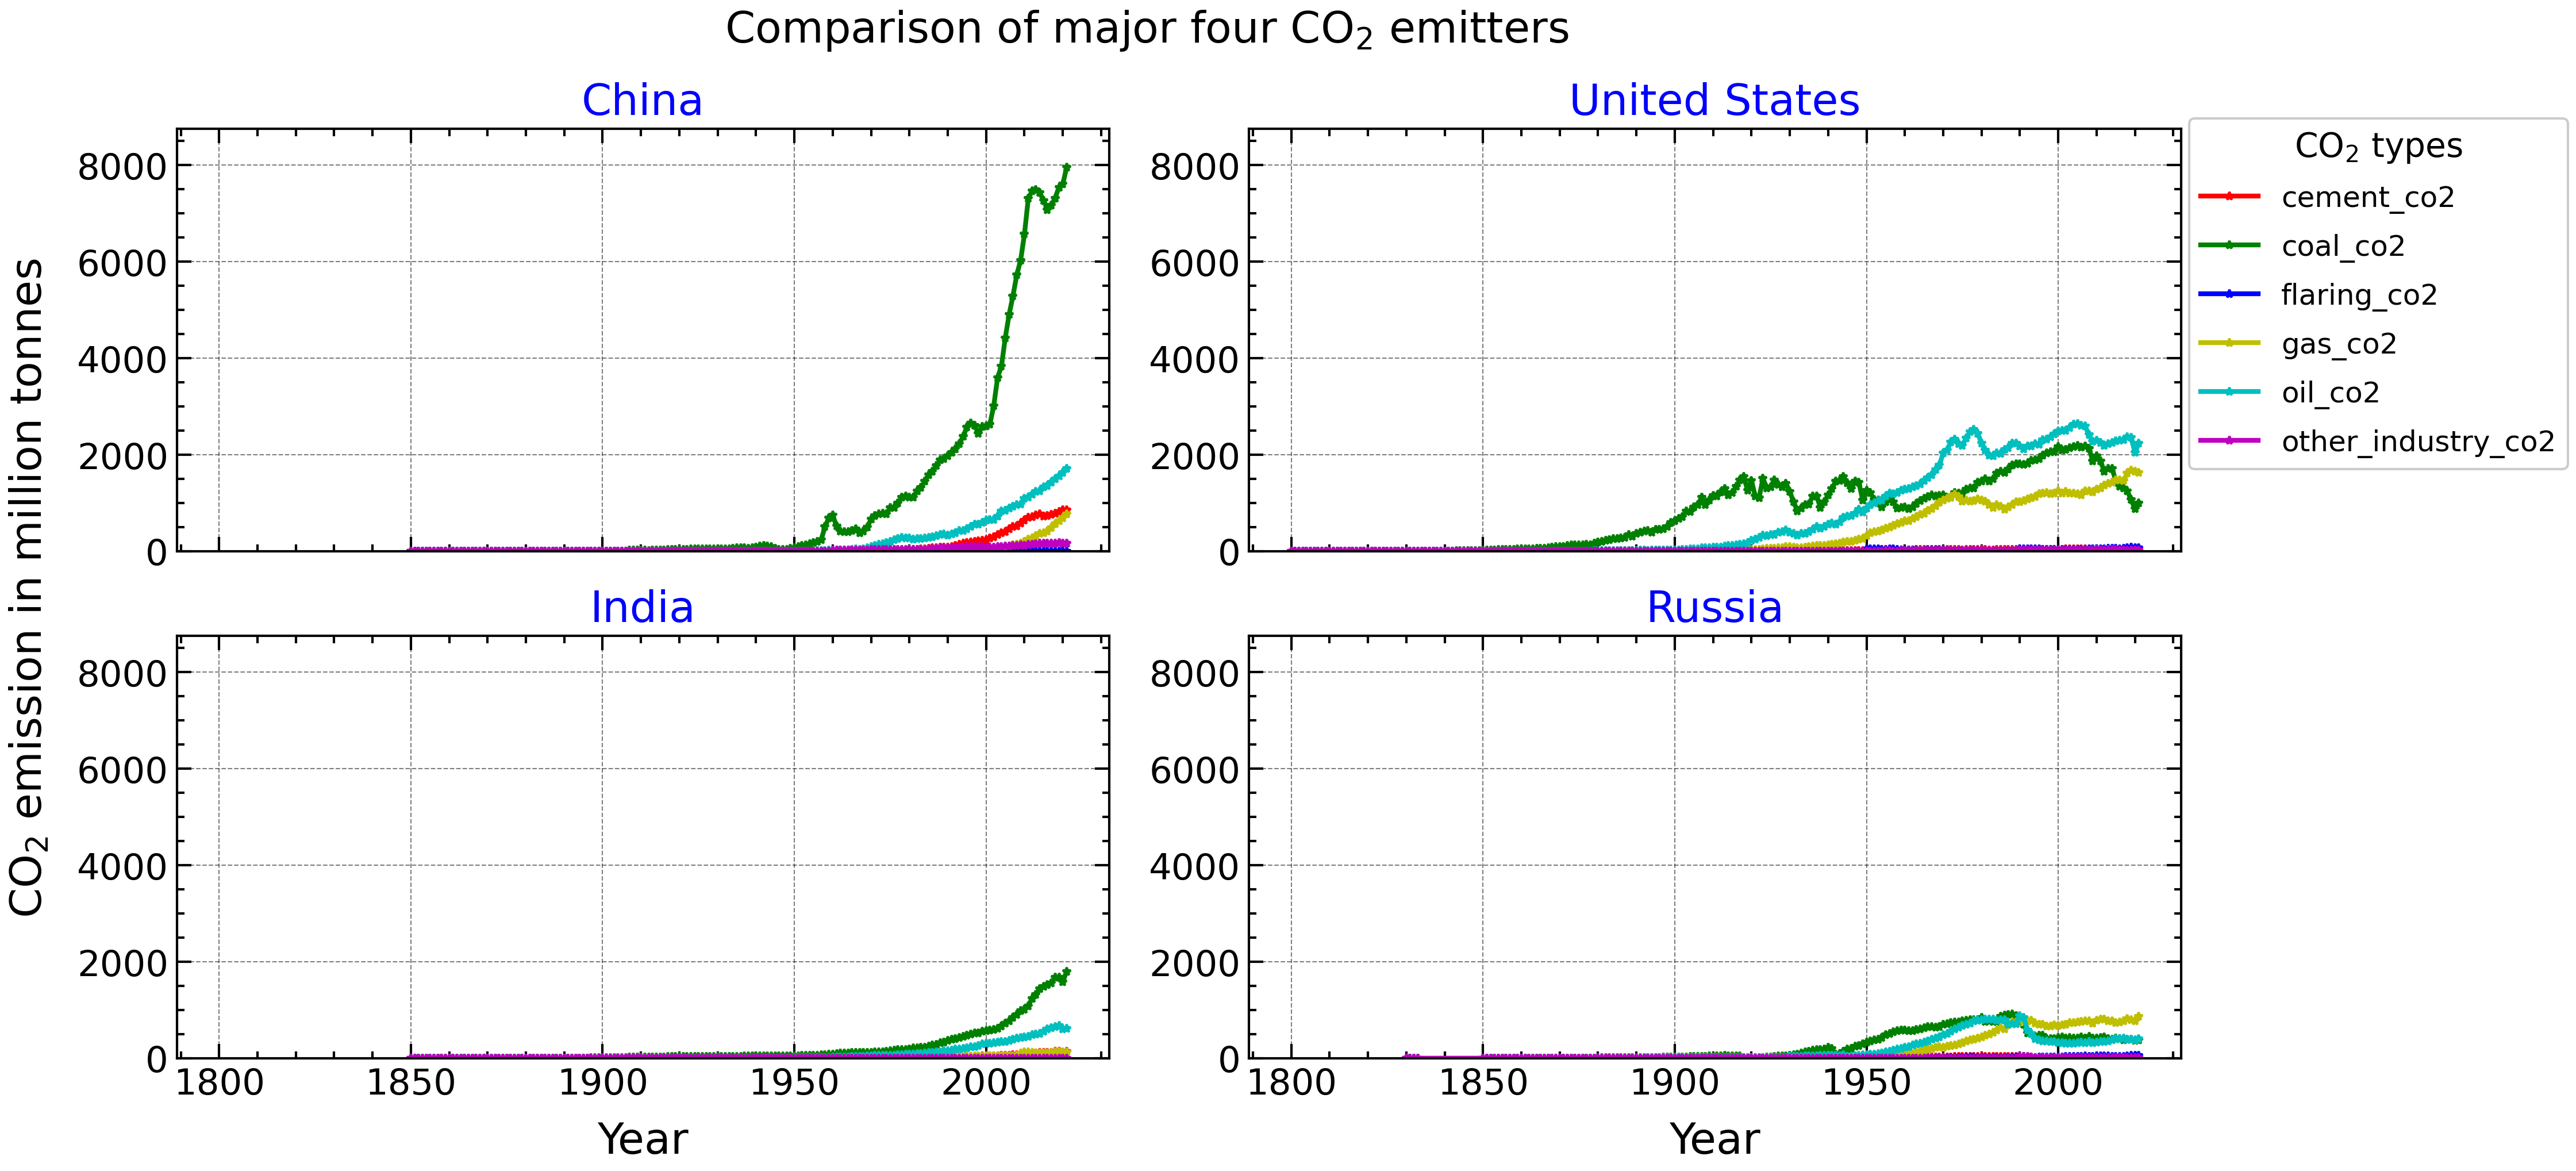

In [95]:
def lineplot_major_emitters(emitters: list[str, ...], dataframe: pd.DataFrame, year_interval) -> None:
    """
    Plots static line plots for all the years for the four main emitters.
    """
    try:
        plt.style.use(['science', 'notebook', 'grid'])
    except OSError:
        print("\033[1mNote:\033[0m science, notebook, grid style not found, defaulting to matplotlib seaborn-whitegrid style\n")
        plt.style.use(['seaborn-whitegrid'])
        
    fig, axes = plt.subplots(2, 2, figsize=[15, 7], dpi=300, sharex=True, sharey=False)  
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.15, hspace=None)
    fig.supylabel('CO$_{2}$ emission in million tonnes', fontsize=18, x=0.06)
    fig.suptitle('Comparison of major four CO$_{2}$ emitters', fontsize=18)

    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    axs = axes.flat
    
    start_yr = dataframe['year'].min()
    end_yr = dataframe['year'].max()
    year_array_integer = np.arange(start=start_yr, stop=end_yr + year_interval, step=year_interval, dtype=int)
    dataframe = dataframe[dataframe.year.isin(year_array_integer)]
   
    for i_ind, j_country in enumerate(emitters):
        df_data_single_country = dataframe[dataframe.country==j_country]
       
        df_data_single_country.plot(x='year', y=df_data_single_country.columns[2:], kind='line',
                         fontsize=15, ax=axs[i_ind], color=colors, legend=False, marker='*', markersize=3.5)
        axs[i_ind].set_xlabel('Year', fontsize=18, labelpad=8.0)
        axs[i_ind].set_title(j_country, fontsize=18, pad=6.0, color='b')
        
        y_max = dataframe.loc[:,'cement_co2':'other_industry_co2'].values.max()
        axs[i_ind].set_ylim(0,y_max+(0.1*y_max))
        
    plt.legend(title='CO$_{2}$ types', title_fontsize=14, fontsize=12, fancybox=True, 
                  loc='center right', bbox_to_anchor=(1.43, 1.81), labelspacing=0.7, ncol=1)
    plt.show()
    
major_emitters =["China", "United States", "India", "Russia"]
co2_types_country_yr = ['country', 'year', 'cement_co2', 'coal_co2',
                       'flaring_co2', 'gas_co2','oil_co2', 'other_industry_co2']

data_df = major_emitters_all_years_df(emitters=major_emitters, co2_types = co2_types_country_yr)
lineplot_major_emitters(major_emitters, data_df,1)

2. Interactive lineplots

In [90]:
# Sets of input values. The lineplots has to be for four pots only. You choose any four country of your choice
major_emitters =["China", "United States", "India", "Russia"]
co2_types_country_yr = ['country', 'year', 'cement_co2', 'coal_co2',
                       'flaring_co2', 'gas_co2','oil_co2', 'other_industry_co2']

data_df = major_emitters_all_years_df(emitters=major_emitters, co2_types = co2_types_country_yr)
yr_interval=1 # this countrols the year interval in the dropdown menu via list_of_zipped_arrays function
input_values = list_of_zipped_arrays(dataframe=data_df, year_interval=yr_interval) 

#dropdown input
widget_start_value = data_df['year'].min()
widget_start_yr = ipywidgets.widgets.Dropdown(options=input_values, 
                                     value=widget_start_value, description='Start year:')
widget_end_yr = ipywidgets.widgets.Dropdown(options=input_values, 
                                     value=widget_start_value, description='End year:')

@ipywidgets.interact(start_year=widget_start_yr, end_year=widget_end_yr)
def interactive_lineplots_major_emitters(start_year, end_year) -> None:
   
    # Matplotlib styling
    try:
        plt.style.use(['science', 'notebook', 'grid'])
    except OSError:
        print("\033[1mNote:\033[0m science, notebook, grid style not found, defaulting to matplotlib seaborn-whitegrid style")
        plt.style.use(['seaborn-whitegrid'])
        
    fig, axes = plt.subplots(2, 2, figsize=[15, 7], dpi=300, sharex=True, sharey=False)  
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.15, hspace=None)
    fig.supylabel('CO$_{2}$ emission in million tonnes', fontsize=18, x=0.06)
    fig.suptitle('Comparison of major four CO$_{2}$ emitters', fontsize=18)
    colors = ['r', 'g', 'b', 'y', 'c', 'm']

    if start_year > end_year:
        print('\033[1mStart yaer must be less than end year, select the correct range.')
        end_year = start_year
        
    year_gap = yr_interval
    year_array_integer = np.arange(start=start_year, stop=end_year + year_gap, step=year_gap, dtype=int)

    df_select_yr = data_df[data_df.year.isin(year_array_integer)]
    axs = axes.flat

    for i_ind, j_country in enumerate(major_emitters):
        df_data_ctry = df_select_yr[df_select_yr.country==j_country]

        df_data_ctry.plot(x='year', y=df_data_ctry.columns[2:], kind='line',marker='*', 
                         fontsize=15, ax=axs[i_ind], color=colors, legend=False, markersize=3.5)
        axs[i_ind].set_xlabel('Year', fontsize=18, labelpad=8.0)
        axs[i_ind].set_title(j_country, fontsize=18, pad=6.0, color='b')
        
        y_max = df_select_yr.loc[:,'cement_co2':'other_industry_co2'].values.max()
        axs[i_ind].set_ylim(0, y_max + (0.1*y_max))  
        
    plt.legend(title='CO$_{2}$ types', title_fontsize=14, fontsize=12, fancybox=True, 
                  loc='center right', bbox_to_anchor=(1.43, 1.81), labelspacing=0.7, ncol=1)
    plt.show()

interactive(children=(Dropdown(description='Start year:', options=(('1800', 1800), ('1801', 1801), ('1802', 18…

#### Conclusion
- Among the six CO$_{2}$ sources looked into, the major source of emission came from coal, oil and gas.
- From 1800 to 1900 most countries emission came mainly from coal with the exception of China (missing record).
- Within this time-frame there was rapid increase in emission from coal by the United States relative to the three other countries
- However, from 1900 to 2000, China emission came mostly from coal with a rapid increase from 1950. Within same period the United States has most of it emissions from the combination of coal, oil and gas with oil overtaking coal around 1950.
- Overall emission from India and Russia were minor compared to China and United States. Hence, effort should be made to encourage usage of renewable energy sources particularly in United States and China. 

In [98]:
#lineplot_major_emitters() ;

In [99]:
#display_interactive_lineplot();

## Nigeria

In [49]:
def df_all_year_data_nigeria() -> pd.DataFrame:
    """
    Selected co2 types using the function defined above
    """
    major_emitters =["Nigeria"]
    co2_types_country_yr = ['country', 'year', 'cement_co2', 'coal_co2', 'flaring_co2', 'gas_co2','oil_co2', 'other_industry_co2']
    
    df_country_all_year_data, _ = df_filter_country_columns(df)
    
    # Select dataframe based on ons some columns 'co2_types_country_yr'
    df_country_all_year_data = df_country_all_year_data[co2_types_country_yr]
    
    # Select dataframe based on four major emitters. It is assumed we already know them.
    df_country_all_year_data = df_country_all_year_data.loc[df_country_all_year_data['country'].isin(major_emitters)]
    df_country_all_year_data.fillna(0, inplace=True)
    
    return df_country_all_year_data

In [50]:
df_all_year_data_nigeria().head(3)

,country,year,cement_co2,coal_co2,flaring_co2,gas_co2,oil_co2,other_industry_co2
29862,Nigeria,1850,0.0,0.0,0.0,0.0,0.0,0.0
29863,Nigeria,1851,0.0,0.0,0.0,0.0,0.0,0.0
29864,Nigeria,1852,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
def df_single_yr_data_nigeria(Year: int) -> pd.DataFrame:
    """
    Aim to create dataframe of a single year for the four major emitters
    """
    df_country_data = df_all_year_data_nigeria()# This function is defined above
    df_single_yr = df_country_data[df_country_data['year'].isin([Year])]
    
    # Sum using axis = 1. Same as sum every value in a single row and assign it 
    # to 'cal_co2_total' column
    df_single_yr.fillna(0, inplace=True)
    df_single_yr['cal_co2_total'] = df_single_yr.loc[:,'cement_co2':].sum(axis=1)
    
    # From cement_co2 column divide each row by corresponding 'cal_co2_total' using axis = 0
    df_single_yr.loc[:,'cement_co2':] = df_single_yr.loc[:,'cement_co2':].div(df_single_yr['cal_co2_total'], axis=0)
    df_single_yr.fillna(0, inplace=True)

    df_single_yr.loc[:,'cement_co2':] = df_single_yr.loc[:,'cement_co2':].multiply(100)
    
    return df_single_yr

In [52]:
df_single_yr_data_nigeria(1950)

,country,year,cement_co2,coal_co2,flaring_co2,gas_co2,oil_co2,other_industry_co2,cal_co2_total
29962,Nigeria,1950,0.0,76.606114,0.0,0.0,23.393886,0.0,100.0


In [53]:
def list_of_zipped_arrays_nigeria() -> list:
    """
    Note: this function will be used by two functions bellow.
    Before calling the 'ipywidgets.interact' from ipywidgets module, I want to 
    create an input of the form [('1800', 1800), ('1810', 1810), ...]. This 
    will be used in the dropdown menu. My year will start from the date on 
    the filtered df (that contains our four major emitters).
    """
    # Create array of integer years
    start_year = df_all_year_data_nigeria()['year'].min()
    end_year = df_all_year_data_nigeria()['year'].max()
    year_gap = 5
    year_array_integer = np.arange(start=start_year, stop=end_year + year_gap,
                                   step=year_gap, dtype=int)

    # Create array of integer string using previous array of integer years
    year_array_string = map(str, year_array_integer)

    # Now zip both variables to achive something like [('1800', 1800), ('1810', 1810), ...]
    input_value = list(zip(year_array_string, year_array_integer))
    
    return input_value

def display_any_year_df_nigeria() -> Callable:
    
    """
    Aim: To print dataframe of any year of interest in form of a dropdown menu. 
    The year must be a value in the dataframe year column. To understand 
    this code you may have to read ipywidget module in python.
    
    Note: function iscan be passed as an arguement/parameter (This is called first class 
    function or citizen, a typical python property). This information is needed 
    # in the next steps.
    """
    # Note: df_single_yr_data is function (df_single_yr_data() ) but has to be
    # passed as an arguement. This is in line with the ipywidgets documentation.
    function_df = df_single_yr_data_nigeria # not as df_single_yr_data()
    
    # Function already defined above
    interactive_input_value = list_of_zipped_arrays() 

    # Call the interactive dropdown. The functiond_df, takes each elements in the
    # interactive_input_value as input one at a time. The variable Year must be the same
    # as the input variable for function_df (or df_single_yr_data()).
    
    dropdown_df = ipywidgets.interact(function_df, Year=interactive_input_value)
    return dropdown_df

In [20]:
display_any_year_df_nigeria();

interactive(children=(Dropdown(description='Year', options=(('1800', 1800), ('1805', 1805), ('1810', 1810), ('…

In [58]:
def plot_co2_types_nigeria_countribution(Year: int) -> None:
    
    """
    These plot is for the percentage of indiviual co2 contribution.
    It answers question like what is the percentage of China contribution 
    to the different co2 types for a particular year. 
    """
    plt.style.use(['science', 'notebook', 'grid'])
    df_sel_co2_data = df_single_yr_data_nigeria(Year)
    columns_to_plot = df_sel_co2_data.columns[2:-1]
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    
    # PLOTTING
    df_sel_co2_data.plot(x='country', y= columns_to_plot, kind='bar', stacked=True, fontsize=15,
                         figsize=(15,7), rot=0, color=colors, legend=True)#ylim=(0,105)

    plt.legend(title='CO$_{2}$ types', title_fontsize=14, fontsize=12, fancybox=True, 
               loc='center right', bbox_to_anchor=(1.2, 0.8), labelspacing=0.7, ncol=1)
    
    plt.xlabel('Country', fontsize=18, labelpad=6.0)
    plt.ylabel('Percentage of CO$_{2}$ emission', fontsize=18, labelpad=6.0)
    plt.title(f'Contribution of four major CO$_{2}$ emitters in {Year}', pad=12.0, fontsize=15)
    #plt.savefig(f'file {yr}')
    plt.show()

def display_any_year_barplot_nigeria():
    plt.style.use(['science', 'notebook', 'grid'])
    """
    This is similar to print_any_year_df().
    Aim: to print stack bar of any year for the four major emitters.
    This plots while the other display dataframe
    """
    input_years = list_of_zipped_arrays() # This function is already defined above
    
    # This function plot_co2_types_country_countribution() has been defined. 
    # Noticed that it is passed as arguemnt also and not as a function. 
    function_stacked_bar = plot_co2_types_nigeria_countribution 
    
    plots_result = ipywidgets.interact(function_stacked_bar , Year=input_years)
    return plots_result  


In [59]:
def interactive_lineplots_nigeria(Year_Range) -> None:
    # Matplotlib styling
    plt.style.use(['science', 'notebook', 'grid'])
    #plt.figure(figsize=(10, 5), dpi=300) 

    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    
    start_year = df_all_year_data_nigeria()['year'].min()
    end_year = Year_Range
    year_gap = 10
    year_array_integer = np.arange(start=start_year, stop=Year_Range + year_gap, step=year_gap, dtype=int)

    df_data = df_all_year_data_nigeria()[df_all_year_data_nigeria().year.isin(year_array_integer)]

    df_data_ctry = df_data[df_data.country=="Nigeria"]

    df_data_ctry.plot(x='year', y=df_data_ctry.columns[2:], kind='line',marker='*', 
                         fontsize=15, color=colors, figsize=(10, 5), legend=False, markersize=3.5)
    plt.xlabel('Year', fontsize=18, labelpad=8.0)
    plt.ylabel('CO$_{2}$ emission in million tonnes', fontsize=18)
    plt.title("Nigeria", fontsize=18, pad=6.0, color='b')
        
    y_max = df_data.loc[:,'cement_co2':'other_industry_co2'].values.max()
    y_min = 0
     
        
    plt.legend(title='CO$_{2}$ types', title_fontsize=14, fontsize=12, fancybox=True, 
                  loc='best', bbox_to_anchor=(1.38, 1.0), labelspacing=0.7, ncol=1) 
    plt.ylim(y_min, y_max + (0.1*y_max)) 
    plt.show()
    
def display_interactive_lineplot_nigeria():
    input_values = list_of_zipped_arrays_nigeria()
    result_int = ipywidgets.interact(interactive_lineplots_nigeria, Year_Range=input_values)
    return result_int

display_interactive_lineplot_nigeria();

interactive(children=(Dropdown(description='Year_Range', options=(('1850', 1850), ('1855', 1855), ('1860', 186…